In [1]:
import os
from glob import glob
from imagedaemon import registry
# let's try to run the winter calibration pipeline
from imagedaemon.utils.paths import RAW_DATA_DIR
from imagedaemon.utils.image import Image
from imagedaemon.utils.wcs_utils import pix2sky



available_cameras = registry.available()
print("Registered cameras:", available_cameras)

# check the camera parameters
for camname in available_cameras:
    camera = registry.get(camname)
    print("camera:")
    for entry in camera.meta:
        print(f"\t {entry}")

PROJECT_ROOT = /Users/nlourie/Desktop/Work/MIT/WINTER/GIT/winter-image-daemon/imagedaemon
CONFIG_DIR = /Users/nlourie/Desktop/Work/MIT/WINTER/GIT/winter-image-daemon/imagedaemon/imagedaemon/config
astro_scamp = /Users/nlourie/Desktop/Work/MIT/WINTER/GIT/winter-image-daemon/imagedaemon/imagedaemon/config/scamp.conf
masterbias_dir = /Users/nlourie/data/image-daemon-data/calibration/masterbias
Registered cameras: ['qcmos', 'summer-ccd', 'winter']
camera:
	 ('name', 'qcmos')
	 ('pixel_scale', 0.157)
	 ('scale_margin', 0.05)
	 ('hot_pixel_threshold', 200)
	 ('cal_steps', {'dark': False, 'lab_flat': False, 'dither_flat': False, 'sky_flat': False, 'remove_horizontal_stripes': False, 'mask': False, 'mask_hot_pixels': True, 'replace_nans_with_median': True})
	 ('focus_addrs', [])
	 ('focus_cal_steps', {'dark': True, 'lab_flat': False, 'dither_flat': True, 'sky_flat': False, 'remove_horizontal_stripes': False, 'mask': False, 'mask_hot_pixels': False, 'replace_nans_with_median': True})
	 ('focus_

Science image: /Users/nlourie/data/image-daemon-data/raw/summer-ccd/focus/SUMMER_20221026_182502_Camera0.fits


[I imagedaemon.pipeline] Calibration started | camera=summer-ccd image=/Users/nlourie/data/image-daemon-data/raw/summer-ccd/focus/SUMMER_20221026_182502_Camera0.fits


data: [array([[14426., 18053., 18030., ..., 17529., 17384., 13594.],
       [16916., 21624., 21264., ..., 20915., 21226., 15721.],
       [19196., 20902., 21558., ..., 20485., 20363., 18313.],
       ...,
       [20853., 20683., 20927., ..., 22238., 21967., 21417.],
       [21021., 21025., 20475., ..., 21910., 22298., 21643.],
       [    0.,  6103., 33792., ..., 65535., 65535., 65535.]],
      dtype=float32), array([[12521., 15817., 15973., ..., 15544., 15149., 11681.],
       [14904., 18574., 18674., ..., 18325., 18615., 13989.],
       [16740., 18284., 18776., ..., 17686., 18000., 15858.],
       ...,
       [18114., 18179., 18060., ..., 19360., 18912., 18744.],
       [18165., 17901., 18019., ..., 19216., 18942., 19003.],
       [    0.,  6103., 33792., ..., 65535., 65535., 65535.]],
      dtype=float32), array([[11169., 13893., 13896., ..., 13814., 13494., 10659.],
       [13010., 16485., 16663., ..., 16007., 16194., 12104.],
       [14946., 16277., 16395., ..., 15639., 15714., 14

[W imagedaemon.pipeline] No dark frame available for None, using zero array instead


median_data.shape: (2049, 2048)


/Users/nlourie/Desktop/Work/MIT/WINTER/GIT/winter-image-daemon/imagedaemon/processing/calibration.py:42: RuntimeWarning: invalid value encountered in divide
  return data / flat_data
[I imagedaemon.pipeline] Calibration started | camera=summer-ccd image=/Users/nlourie/data/image-daemon-data/raw/summer-ccd/focus/SUMMER_20221026_182502_Camera0.fits


ValueError: Invalid image list: Must contain Image objects or paths.

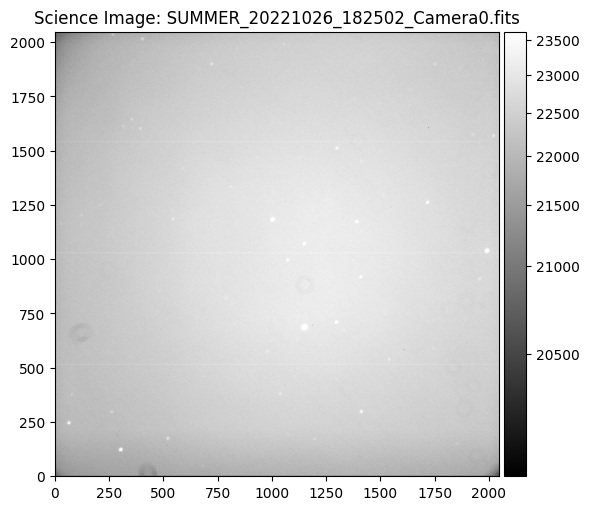

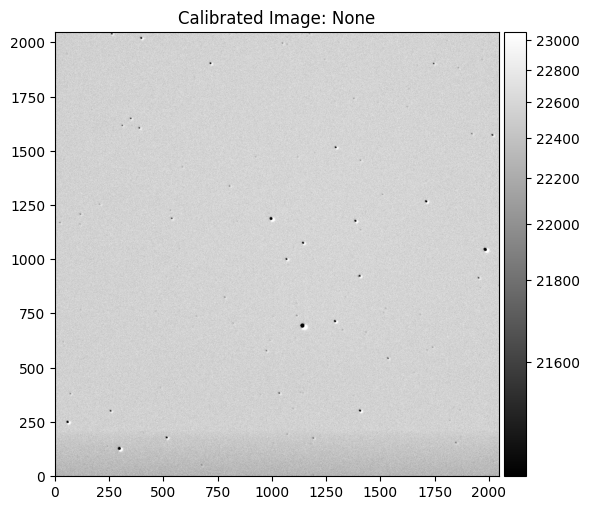

In [ ]:
# now run astrometry on a summer-ccd image

# try again with a full summer-ccd image
summerccd = registry.get("summer-ccd")

image_dir = os.path.join(RAW_DATA_DIR, "summer-ccd", "focus")
science_images = sorted(glob(os.path.join(image_dir, "*.fits")))
science_image = science_images[0]
print(f"Science image: {science_image}")

# plot the image just for fun
image = Image(science_image)
image.plot_image(title = f"Science Image: {image.filename}",)

# run the full astrometric pipeline
output_dir = os.path.join(os.path.join(os.getenv("HOME"), "data", "tmp"))

# background images
background_images = science_images


# this image has no RA/Dec in the header, so we need to set it
ra_guess = None
dec_guess = None

# calibrate the image
calimg = summerccd.calibrate_image(science_image = science_image, 
                                 background_image_list = background_images)

# try to save the calibrated image
# plot the image
calimg.plot_image(title = f"Calibrated Image: {calimg.filename}",)

info = summerccd.get_astrometric_solution(science_image = science_image,
                                      background_image_list = None,
                                      output_dir = output_dir,
                                      ra = None,
                                      dec = None,
    )
wcs = info["wcs"]
# the image is 4096 x 2304
wx = 2048
wy = 2049
# let's try to get the WCS for a pixel in the center of the image
x_pix, y_pix = wx // 2, wy // 2
sky_pos = pix2sky(x_pix, y_pix, wcs)
print(
    f"Coord conversion: (x, y) = ({x_pix}, {y_pix}) -> (RA, Dec) = ({sky_pos.ra:.1f}, {sky_pos.dec:.1f}) deg"
)